In [13]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords


stops = set(stopwords.words("english"))
pd.set_option('max_colwidth', 40)

[nltk_data] Downloading package punkt to /Users/apum/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /Users/apum/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
gap_df = pd.read_csv('data/raw/gap-coreference/gap-development.tsv', sep='\t')

In [4]:
gap_df.describe()

,Pronoun-offset,A-offset,B-offset
count,2000.000000,2000.00000,2000.000000
mean,324.963500,239.77800,300.535500
std,98.788591,111.15768,113.226357
min,3.000000,0.00000,16.000000
25%,274.000000,179.75000,237.000000
50%,316.000000,239.00000,294.000000
75%,370.000000,301.25000,358.000000
max,1135.000000,971.00000,1098.000000


In [5]:
gap_df[['Text', 'A', 'B']].describe()

,Text,A,B
count,2000,2000,2000
unique,1999,1793,1774
top,"According to her mother, Tatyana Vla...",Elizabeth,Mary
freq,2,7,8


In [6]:
gap_df['Text'][1][284:]

'His simple, wheel-thrown functional pottery is heavily influenced by the oriental aesthetic of Shoji Hamada and Kanjiro Kawai.'

In [7]:
gap_df['Text'][1]

'He grew up in Evanston, Illinois the second oldest of five children including his brothers, Fred and Gordon and sisters, Marge (Peppy) and Marilyn. His high school days were spent at New Trier High School in Winnetka, Illinois. MacKenzie studied with Bernard Leach from 1949 to 1952. His simple, wheel-thrown functional pottery is heavily influenced by the oriental aesthetic of Shoji Hamada and Kanjiro Kawai.'

In [8]:
gap_df.head()

,ID,Text,Pronoun,Pronoun-offset,A,A-offset,A-coref,B,B-offset,B-coref,URL
0,development-1,Zoe Telford -- played the police off...,her,274,Cheryl Cassidy,191,True,Pauline,207,False,http://en.wikipedia.org/wiki/List_of...
1,development-2,"He grew up in Evanston, Illinois the...",His,284,MacKenzie,228,True,Bernard Leach,251,False,http://en.wikipedia.org/wiki/Warren_...
2,development-3,"He had been reelected to Congress, b...",his,265,Angeloz,173,False,De la Sota,246,True,http://en.wikipedia.org/wiki/Jos%C3%...
3,development-4,The current members of Crime have al...,his,321,Hell,174,False,Henry Rosenthal,336,True,http://en.wikipedia.org/wiki/Crime_(...
4,development-5,Her Santa Fe Opera debut in 2005 was...,She,437,Kitty Oppenheimer,219,False,Rivera,294,True,http://en.wikipedia.org/wiki/Jessica...


In [9]:
gap_df['Pronoun'].value_counts()

her    534
his    496
she    249
he     235
She    179
He     138
him     98
Her     38
His     33
Name: Pronoun, dtype: int64

In [10]:
def words_before(x):
    return len(x[0][:x[1]].split(' '))

def words_after(x):
    return len(x[0][x[1]:].split(' '))-1

def words_between(x):
    if (x[1] > x[2]):
        return len(x[0][x[2]:x[1]].split(' '))-1
    else:
        return len(x[0][x[1]:x[2]].split(' '))-1

In [11]:
gap_text = pd.Series(gap_df['Text'].tolist())

avgchar = np.mean(gap_text.apply(len))
avgword = np.mean(gap_text.apply(lambda x: len(x.split(' '))))
avgstopw = np.mean(gap_text.apply(lambda x: len([x for x in x.split() if x in stops])))

stdchar = np.std(gap_text.apply(len))
stdword = np.std(gap_text.apply(lambda x: len(x.split(' '))))
stdstopw = np.std(gap_text.apply(lambda x: len([x for x in x.split() if x in stops])))

avgbf = np.mean(gap_df[['Text', 'Pronoun-offset']].apply(words_before, axis=1))
stdbf = np.std(gap_df[['Text', 'Pronoun-offset']].apply(words_before, axis=1))

avgaf = np.mean(gap_df[['Text', 'Pronoun-offset']].apply(words_after, axis=1))
stdaf = np.std(gap_df[['Text', 'Pronoun-offset']].apply(words_after, axis=1))

avgAoffset = np.mean(gap_df[['Text', 'Pronoun-offset', 'A-offset']].apply(words_between, axis=1))
stdAoffset = np.std(gap_df[['Text', 'Pronoun-offset', 'A-offset']].apply(words_between, axis=1))

avgBoffset = np.mean(gap_df[['Text', 'Pronoun-offset', 'B-offset']].apply(words_between, axis=1))
stdBoffset = np.std(gap_df[['Text', 'Pronoun-offset', 'B-offset']].apply(words_between, axis=1))

print('Average number of characters: {:.2f} +/- {:.2f}'.format(avgchar, stdchar))
print('Average number of words: {:.2f} +/- {:.2f}'.format(avgword, stdword))
print('Average number of stopword: {:.2f} +/- {:.2f} \n'.format(avgstopw, stdstopw))

print('Average number of words before pronoun: {:.2f} +/- {:.2f}'.format(avgbf, stdbf))
print('Average number of words after pronoun: {:.2f} +/- {:.2f} \n'.format(avgaf, stdaf))

print('Average number of words between A and pronoun: {:.2f} +/- {:.2f}'.format(avgAoffset, stdAoffset))
print('Average number of words between B and pronoun: {:.2f} +/- {:.2f} \n'.format(avgBoffset, stdBoffset))

Average number of characters: 426.92 +/- 124.60
Average number of words: 71.20 +/- 20.52
Average number of stopword: 26.08 +/- 9.55 

Average number of words before pronoun: 54.93 +/- 16.27
Average number of words after pronoun: 16.27 +/- 12.37 

Average number of words between A and pronoun: 15.53 +/- 10.51
Average number of words between B and pronoun: 9.35 +/- 8.05 



In [37]:
from nltk import tokenize

def keep_sentences(x):
    all_sent = tokenize.sent_tokenize(x[0])
    sent_list = []
    for s in all_sent:
        if s.find(x[5])!=-1 or s.find(x[6])!=-1 or s.find(x[4])!=-1:
            sent_list.append(s)
    return sent_list

gap_df[['Text', 'Pronoun-offset', 'A-offset', 'B-offset', 'Pronoun', 'A', 'B']].apply(keep_sentences, axis=1)[1]

['His high school days were spent at New Trier High School in Winnetka, Illinois.',
 'MacKenzie studied with Bernard Leach from 1949 to 1952.',
 'His simple, wheel-thrown functional pottery is heavily influenced by the oriental aesthetic of Shoji Hamada and Kanjiro Kawai.']

In [38]:
gap_df['Text'][1]

'He grew up in Evanston, Illinois the second oldest of five children including his brothers, Fred and Gordon and sisters, Marge (Peppy) and Marilyn. His high school days were spent at New Trier High School in Winnetka, Illinois. MacKenzie studied with Bernard Leach from 1949 to 1952. His simple, wheel-thrown functional pottery is heavily influenced by the oriental aesthetic of Shoji Hamada and Kanjiro Kawai.'

In [12]:
gap_df['Text-len'] = gap_df['Text'].str.len()
gap_df['Text-word-count'] = gap_df['Text'].map(lambda x: len(x.split(' ')))
gap_df['words-before-pronoun'] = gap_df[['Text', 'Pronoun-offset']].apply(words_before, axis=1)
gap_df['words-after-pronoun'] = gap_df[['Text', 'Pronoun-offset']].apply(words_after, axis=1)
gap_df['words-between-A'] = gap_df[['Text', 'Pronoun-offset', 'A-offset']].apply(words_between, axis=1)
gap_df['words-between-B'] = gap_df[['Text', 'Pronoun-offset', 'B-offset']].apply(words_between, axis=1)

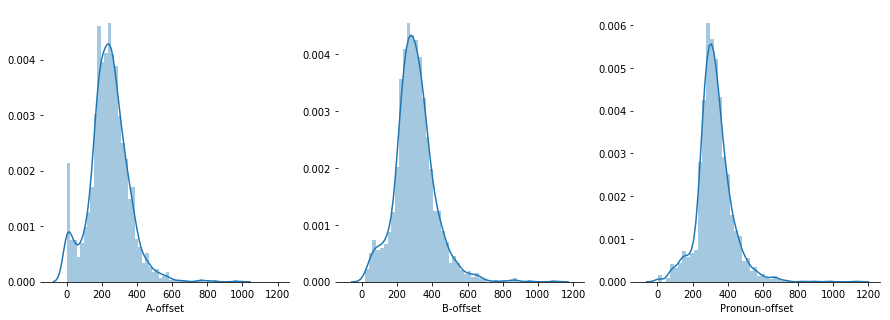

In [13]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.distplot(gap_df['A-offset'], ax=axes[0])
sns.distplot(gap_df['B-offset'], ax=axes[1])
sns.distplot(gap_df['Pronoun-offset'], ax=axes[2])

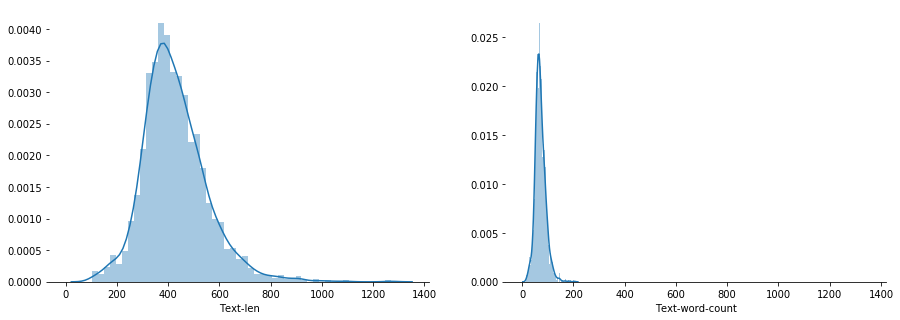

In [14]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.distplot(gap_df['Text-len'], ax=axes[0])
sns.distplot(gap_df['Text-word-count'], ax=axes[1])

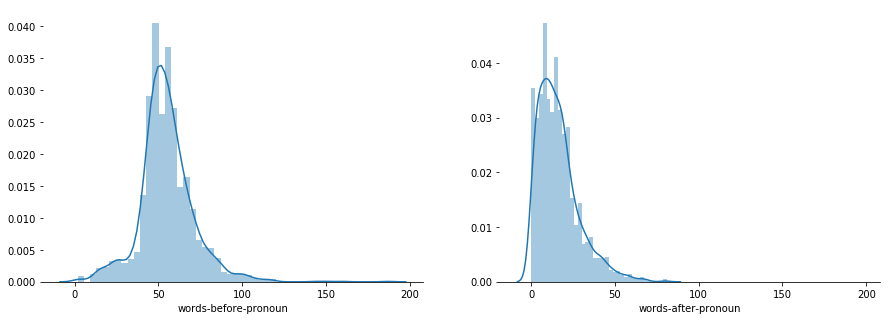

In [15]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.distplot(gap_df['words-before-pronoun'], ax=axes[0])
sns.distplot(gap_df['words-after-pronoun'], ax=axes[1])

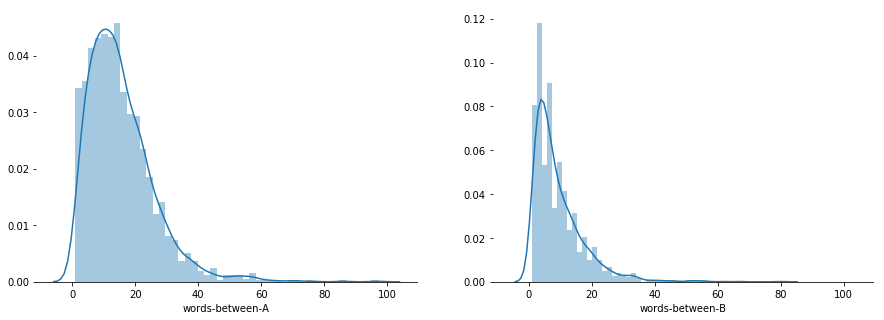

In [16]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)
sns.despine(left=True)

sns.distplot(gap_df['words-between-A'], ax=axes[0])
sns.distplot(gap_df['words-between-B'], ax=axes[1])

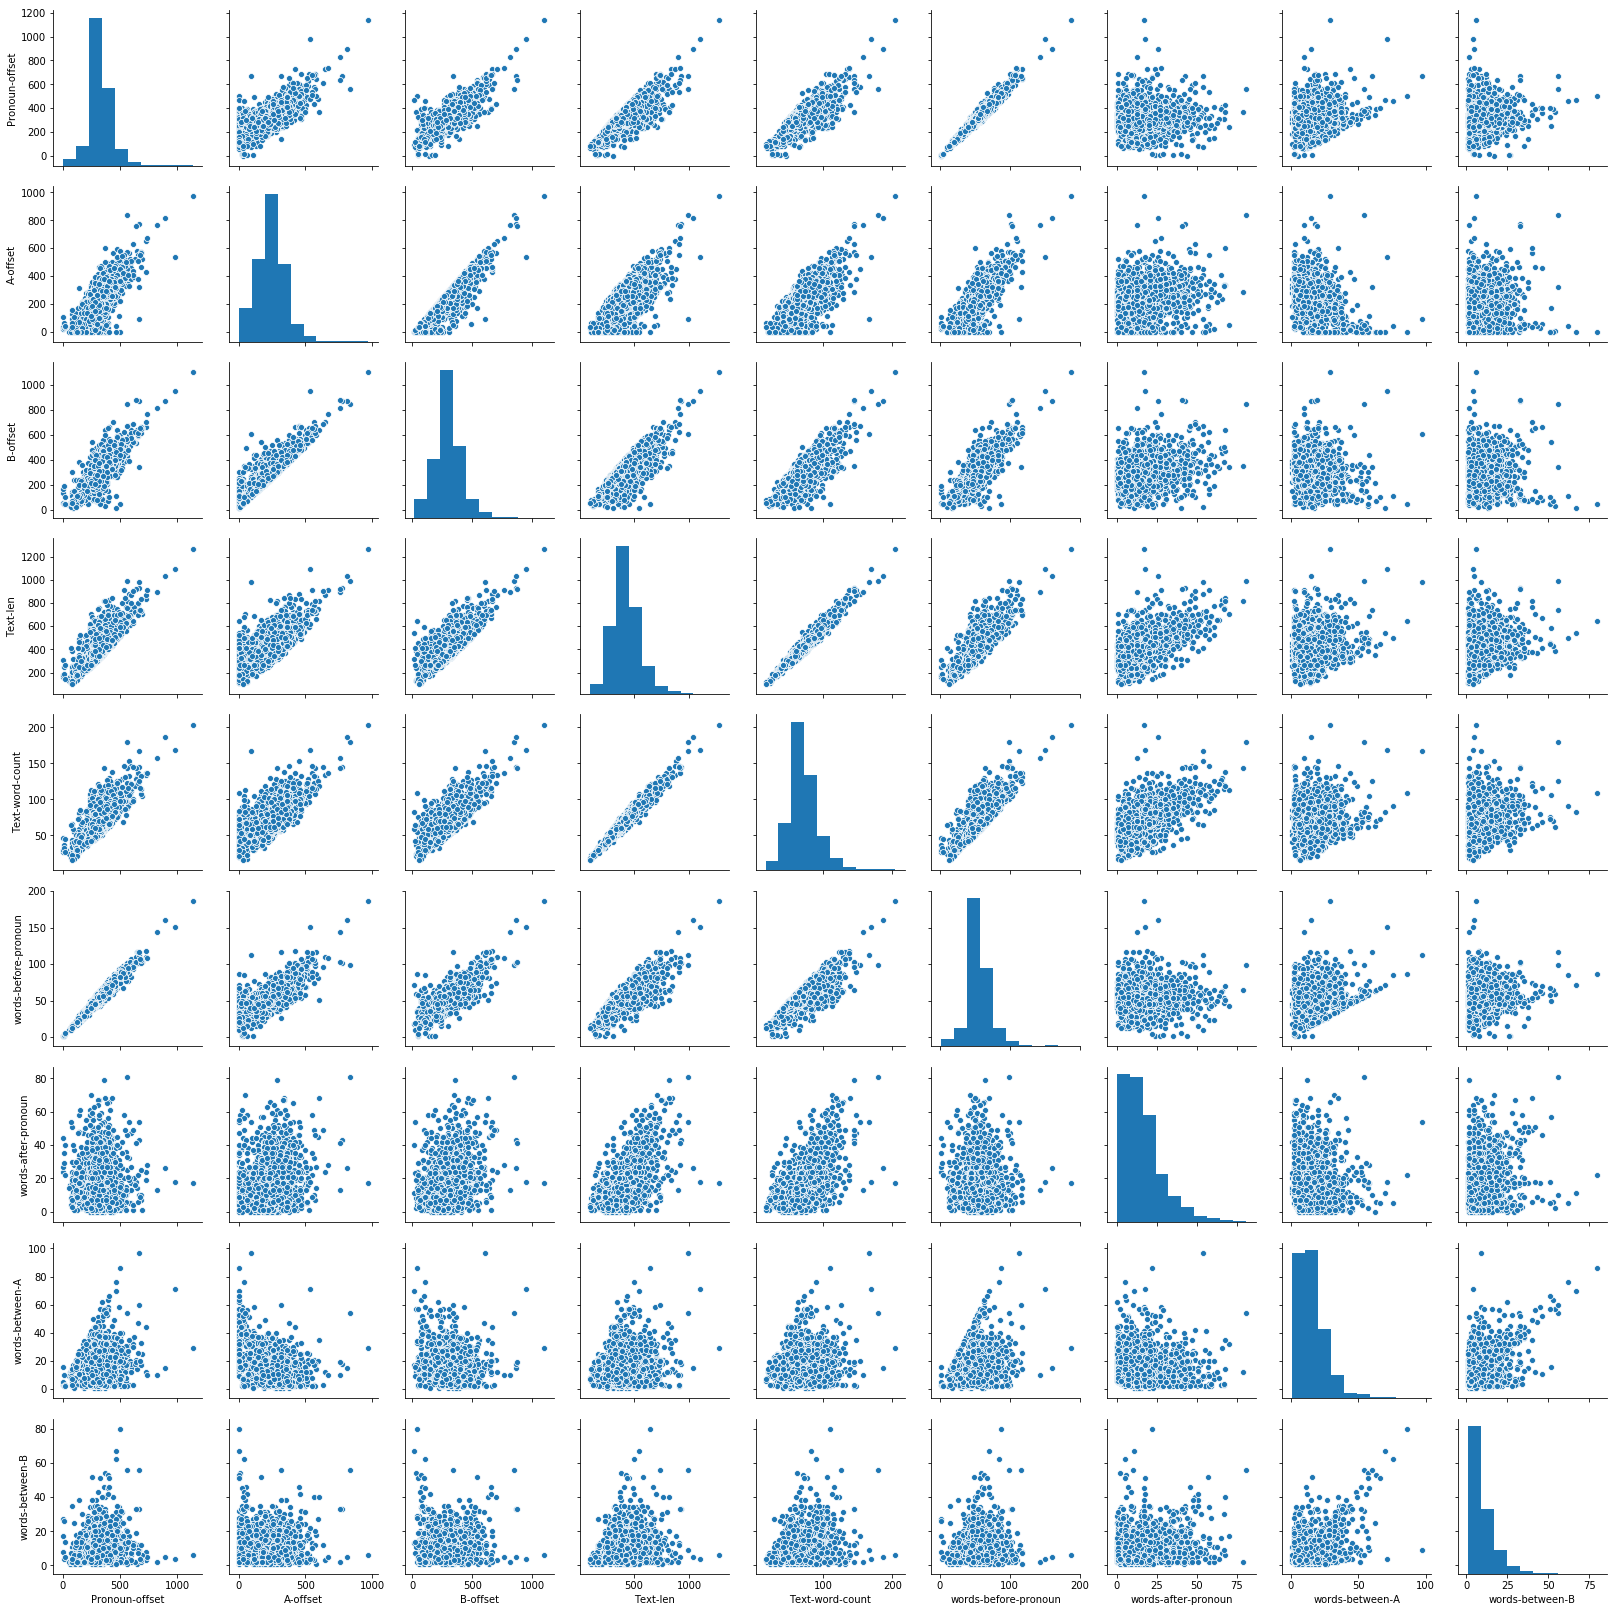

In [17]:
sns.pairplot(gap_df[['Pronoun-offset', 'A-offset', 'B-offset', 'Text-len', 'Text-word-count', 'words-before-pronoun', 'words-after-pronoun', 'words-between-A', 'words-between-B']])